In [1]:
import cvxpy as cp
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from data import *

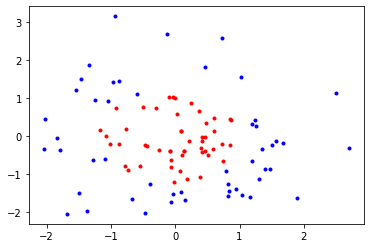

(2, 50)


In [3]:
X = np.random.multivariate_normal([0,0], [[1,0],[0,1]], 100)
# print(np.argpartition(X[:, 0]**2+X[:, 1]**2, 99))
X = X[np.argsort(X[:, 0]**2+X[:, 1]**2), :]
Y = X[50:, :].T
X = X[:50, :].T
Pos = X
Neg = Y

plt.plot(Pos[0,:], Pos[1,:], 'r.')
plt.plot(Neg[0,:], Neg[1,:], 'b.')
plt.show()

print(Pos.shape)

In [4]:
labels = np.concatenate([np.ones(50,), -1*np.ones(50,)])
print(labels.shape)

(100,)


In [5]:
points = np.concatenate([X, Y],axis = 1)
print(points.shape)


(2, 100)


In [6]:
def polynomial_kernel(M):
    return np.array([1, 2**0.5*M[0], 2**0.5*M[1], 2**0.5*np.multiply(M[0],M[1]),M[0]**2, M[1]**2])

points_in_6d = np.apply_along_axis(polynomial_kernel, 0, points)
print(points_in_6d.shape)
print(points_in_6d[:,0])
#for checking
print(2**0.5*points[0,0])



(6, 100)
[1.         0.11706804 0.16052871 0.0132885  0.00685246 0.01288473]
0.1170680423009838


In [7]:

dataset = np.vstack([points_in_6d, labels])
print(dataset.shape)
print(dataset[:,51])

(7, 100)
[ 1.          1.69186484  0.45015256  0.5385306   1.43120331  0.10131866
 -1.        ]


In [8]:
YiXi = np.multiply(points_in_6d,labels.T)
print(YiXi.shape)
print(YiXi[:,51])

(6, 100)
[-1.         -1.69186484 -0.45015256 -0.5385306  -1.43120331 -0.10131866]


In [9]:
D = YiXi.T @YiXi + np.eye(YiXi.shape[1])*1e-5
print(np.all(np.linalg.eigvals(D) >= 0))
lambd = cp.Variable(shape=(100,))
gamma = cp.Variable(shape=(100,))

True


In [21]:
k = 2
C = 0.1
objective = cp.Minimize( -cp.sum(lambd) + 0.5*cp.quad_form(lambd, D))

constraints= [lambd >= 0, lambd.T @ labels == 0, lambd <= C*np.ones(100,), lambd+gamma==C*np.ones(100)]
problem = cp.Problem(objective, constraints)
problem.solve(solver=cp.ECOS, verbose=False)

-2.737097458751094

In [22]:
print(lambd.value.T @labels)
print(lambd.value[np.where(lambd.value <=0)])

-6.408762409648716e-14
[-1.79621015e-12 -4.30635002e-12 -6.49434536e-12 -1.00795845e-11
 -3.44107239e-13 -4.61704719e-12 -9.97427985e-12]


In [23]:
j = np.multiply(YiXi, lambd.value.T)
print(j.shape)
w = np.sum(j,axis = 1)
print(w.shape)
print(w)

(6, 100)
(6,)
[-6.36371671e-14 -1.51733581e-01  7.67055176e-02  2.00003262e-01
 -9.79967252e-01 -8.80513906e-01]


In [43]:
lamb2 = np.round(lambd.value,3)
k = np.where((lamb2 < C - 1e-5) & (lamb2 > 0))
print(k)
print(np.round(lambd.value,3))

(array([22, 62, 63, 73, 79, 81]),)
[ 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.02   0.     0.     0.1    0.     0.     0.     0.1
  0.     0.     0.     0.1    0.     0.1    0.1    0.1    0.1    0.1
  0.1    0.1    0.1    0.1    0.1    0.1    0.1    0.1    0.1    0.1
  0.1    0.1    0.1    0.1    0.1    0.1    0.1    0.1    0.1    0.1
  0.1    0.1    0.057  0.021  0.1    0.1    0.     0.     0.     0.1
  0.     0.     0.     0.039  0.     0.     0.     0.     0.1    0.047
  0.     0.057  0.     0.     0.     0.     0.     0.     0.    -0.
  0.     0.    -0.    -0.     0.    -0.    -0.    -0.     0.    -0.   ]


In [58]:
for i in k:
    print(labels[i] - w.T @ points_in_6d[:,i])
b = labels[k[0][0]] - w.T @ points_in_6d[:,k[0][0]]
print(b)

[1.72169335 1.72168679 1.72167274 1.72167988 1.72168355 1.72168372]
1.7216933513769068


In [50]:
print(np.where(w.T @ points_in_6d + b >=0))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 51,
       52, 53, 56, 60]),)


In [51]:
print(np.where(w.T @ points_in_6d + b <=0))

(array([50, 54, 55, 57, 58, 59, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
       72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88,
       89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),)


In [52]:
h = 0.02
x_min, x_max = points[0, :].min() - 1, points[0, :].max() + 1
y_min, y_max = points[1, :].min() - 1, points[1, :].max() + 1
print(x_min, x_max)
print(y_min,y_max)
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
print(xx.shape)

-3.038261285745942 3.6954560327909878
-3.056209168987136 4.147529935555744
(361, 337)


In [53]:
def polynomial_hyperplane(x,y,w,b):
    m = np.array([1, 2**0.5*x, 2**0.5*y, 2**0.5*x*y ,x**2, y**2])
    return (w.T @ m + b)


In [54]:
Z = np.ones((xx.shape))
for i in range(xx.shape[0]):
    for j in range(xx.shape[1]):
        Z[i][j] = polynomial_hyperplane(xx[i][j],yy[i][j],w,b)

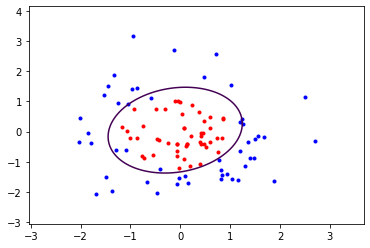

In [55]:
plt.plot(Pos[0,:], Pos[1,:], 'r.')
plt.plot(Neg[0,:], Neg[1,:], 'b.')
plt.contour(xx, yy, Z,[0])
plt.show()